In [1]:
import pandas as pd
from Bio.SeqUtils import ProtParam
from Bio.Seq import Seq
import numpy as np

In [19]:
# Carregar arquivo .tsv exportado do UniProt
df = pd.read_csv('proteinas_20000_enriquecido.csv', encoding='utf-8')

In [20]:
df = df.drop(columns='ID_Proteína')
df.rename(columns={
                'Sequência': 'Sequence',
                'Massa_Molecular': 'Mass',
                'Ponto_Isoelétrico': 'Ponto_Isoeletrico',
                'Proporção_Polar': 'Proporcao_Polar',
                'Proporção_Apolar': 'Proporcao_Apolar',
                'Comprimento_Sequência': 'Length',
                'Classe': 'Classes_GO'
                    }, inplace=True)

print(df.head())

                                            Sequence        Mass  \
0  YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...  24667.4032   
1  CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...  21284.0710   
2  QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...  17255.9747   
3  HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...  11792.1909   
4  NWFTYSTLKKTYFLSATGCEKGYAYRLTTYTYIAPWSMNPLNTHIE...  22641.7108   

   Ponto_Isoeletrico  Hidrofobicidade  Carga_Total  Proporcao_Polar  \
0           5.655161         0.105263            4         0.210526   
1           5.892805         0.150838            3         0.189944   
2           7.228237         0.171141            9         0.181208   
3           8.434802         0.173469            7         0.275510   
4           7.080968         0.162234            5         0.202128   

   Proporcao_Apolar  Length  Classes_GO  
0          0.349282     209   Receptora  
1          0.418994     179  Estrutural  
2          0.422819     149      Enzim

In [21]:
print(df.head())

                                            Sequence        Mass  \
0  YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...  24667.4032   
1  CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...  21284.0710   
2  QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...  17255.9747   
3  HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...  11792.1909   
4  NWFTYSTLKKTYFLSATGCEKGYAYRLTTYTYIAPWSMNPLNTHIE...  22641.7108   

   Ponto_Isoeletrico  Hidrofobicidade  Carga_Total  Proporcao_Polar  \
0           5.655161         0.105263            4         0.210526   
1           5.892805         0.150838            3         0.189944   
2           7.228237         0.171141            9         0.181208   
3           8.434802         0.173469            7         0.275510   
4           7.080968         0.162234            5         0.202128   

   Proporcao_Apolar  Length  Classes_GO  
0          0.349282     209   Receptora  
1          0.418994     179  Estrutural  
2          0.422819     149      Enzim

In [22]:
print(df.describe)

<bound method NDFrame.describe of                                                 Sequence        Mass  \
0      YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...  24667.4032   
1      CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...  21284.0710   
2      QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...  17255.9747   
3      HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...  11792.1909   
4      NWFTYSTLKKTYFLSATGCEKGYAYRLTTYTYIAPWSMNPLNTHIE...  22641.7108   
...                                                  ...         ...   
59995  QGVLVHQCCLKVQYMWYGGPNFLGNKNSMMVHTYLQYMSMGSVPES...  17576.9275   
59996  KNVVYWHMILLNNHWENWHRTMAESTMGMFPTYFSDHFDQKFLWSL...  14658.6439   
59997  CRLHHMHSGACDRQWDHHFNTDPPTLYKCSEAHYKKGLMSSNIVNM...   9412.4561   
59998  DDRPTLVMTTSHFLRLDNYKWCHNHTWMLVPILTQIPSAQVHTRVN...  28956.5694   
59999  TKDNMIEGWLICKDGDAVSDIQQSHSYMSLYHDKIGGPRFWMICIG...  21891.9320   

       Ponto_Isoeletrico  Hidrofobicidade  Carga_Total  Proporcao_Polar  \
0               5.655161  

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sequence           60000 non-null  object 
 1   Mass               60000 non-null  float64
 2   Ponto_Isoeletrico  60000 non-null  float64
 3   Hidrofobicidade    60000 non-null  float64
 4   Carga_Total        60000 non-null  int64  
 5   Proporcao_Polar    60000 non-null  float64
 6   Proporcao_Apolar   60000 non-null  float64
 7   Length             60000 non-null  int64  
 8   Classes_GO         60000 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 4.1+ MB
None


In [24]:
print(df.columns)

Index(['Sequence', 'Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade',
       'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length',
       'Classes_GO'],
      dtype='object')


In [25]:
df_selecionado = df[['Sequence', 'Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length', 'Classes_GO']]

print(df_selecionado.head())

                                            Sequence        Mass  \
0  YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...  24667.4032   
1  CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...  21284.0710   
2  QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...  17255.9747   
3  HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...  11792.1909   
4  NWFTYSTLKKTYFLSATGCEKGYAYRLTTYTYIAPWSMNPLNTHIE...  22641.7108   

   Ponto_Isoeletrico  Hidrofobicidade  Carga_Total  Proporcao_Polar  \
0           5.655161         0.105263            4         0.210526   
1           5.892805         0.150838            3         0.189944   
2           7.228237         0.171141            9         0.181208   
3           8.434802         0.173469            7         0.275510   
4           7.080968         0.162234            5         0.202128   

   Proporcao_Apolar  Length  Classes_GO  
0          0.349282     209   Receptora  
1          0.418994     179  Estrutural  
2          0.422819     149      Enzim

In [26]:
# Filtrar apenas registros com uma única classe
df_puro = df_selecionado[df_selecionado['Classes_GO'].isin(['Enzima', 'Receptora', 'Estrutural', 'Transporte'])]

# Verificar novo balanceamento
print(df_puro['Classes_GO'].value_counts())


Classes_GO
Estrutural    11991
Transporte    11989
Enzima        11954
Receptora     11850
Name: count, dtype: int64


Colunas numéricas disponíveis:
['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length']

Resumo estatístico:
               Mass  Ponto_Isoeletrico  Hidrofobicidade   Carga_Total  \
count  47784.000000       47784.000000     47784.000000  47784.000000   
mean   20801.073773           7.262683         0.149969      8.728612   
std     8629.191673           1.446542         0.027163      7.482460   
min     5407.315100           4.050028         0.007353    -18.000000   
25%    13341.872550           6.055251         0.133094      3.000000   
50%    20776.380800           7.161110         0.150000      8.000000   
75%    28238.927350           8.585916         0.166667     13.000000   
max    37097.077600          11.785610         0.289474     52.000000   

       Proporcao_Polar  Proporcao_Apolar        Length  
count     47784.000000      47784.000000  47784.000000  
mean          0.199994          0.399994    174.806567  
std   

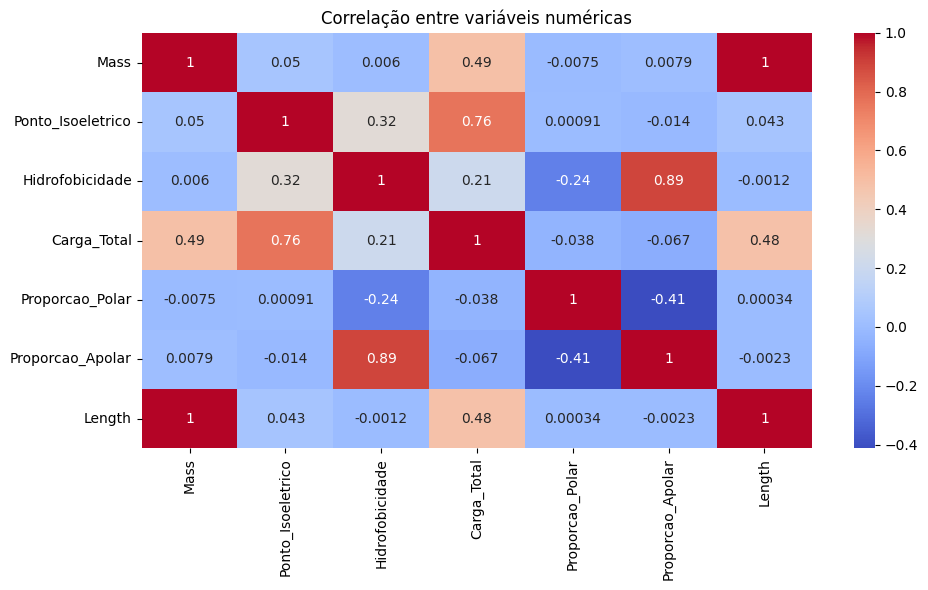


Distribuição das classes (puro):
Classes_GO
Estrutural    11991
Transporte    11989
Enzima        11954
Receptora     11850
Name: count, dtype: int64


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar colunas numéricas
print("Colunas numéricas disponíveis:")
print(df_puro.select_dtypes(include='number').columns.tolist())

# Estatísticas descritivas
print("\nResumo estatístico:")
print(df_puro.describe())

# Correlação entre variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df_puro.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()

# Distribuição das classes
print("\nDistribuição das classes (puro):")
print(df_puro['Classes_GO'].value_counts())


['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length']


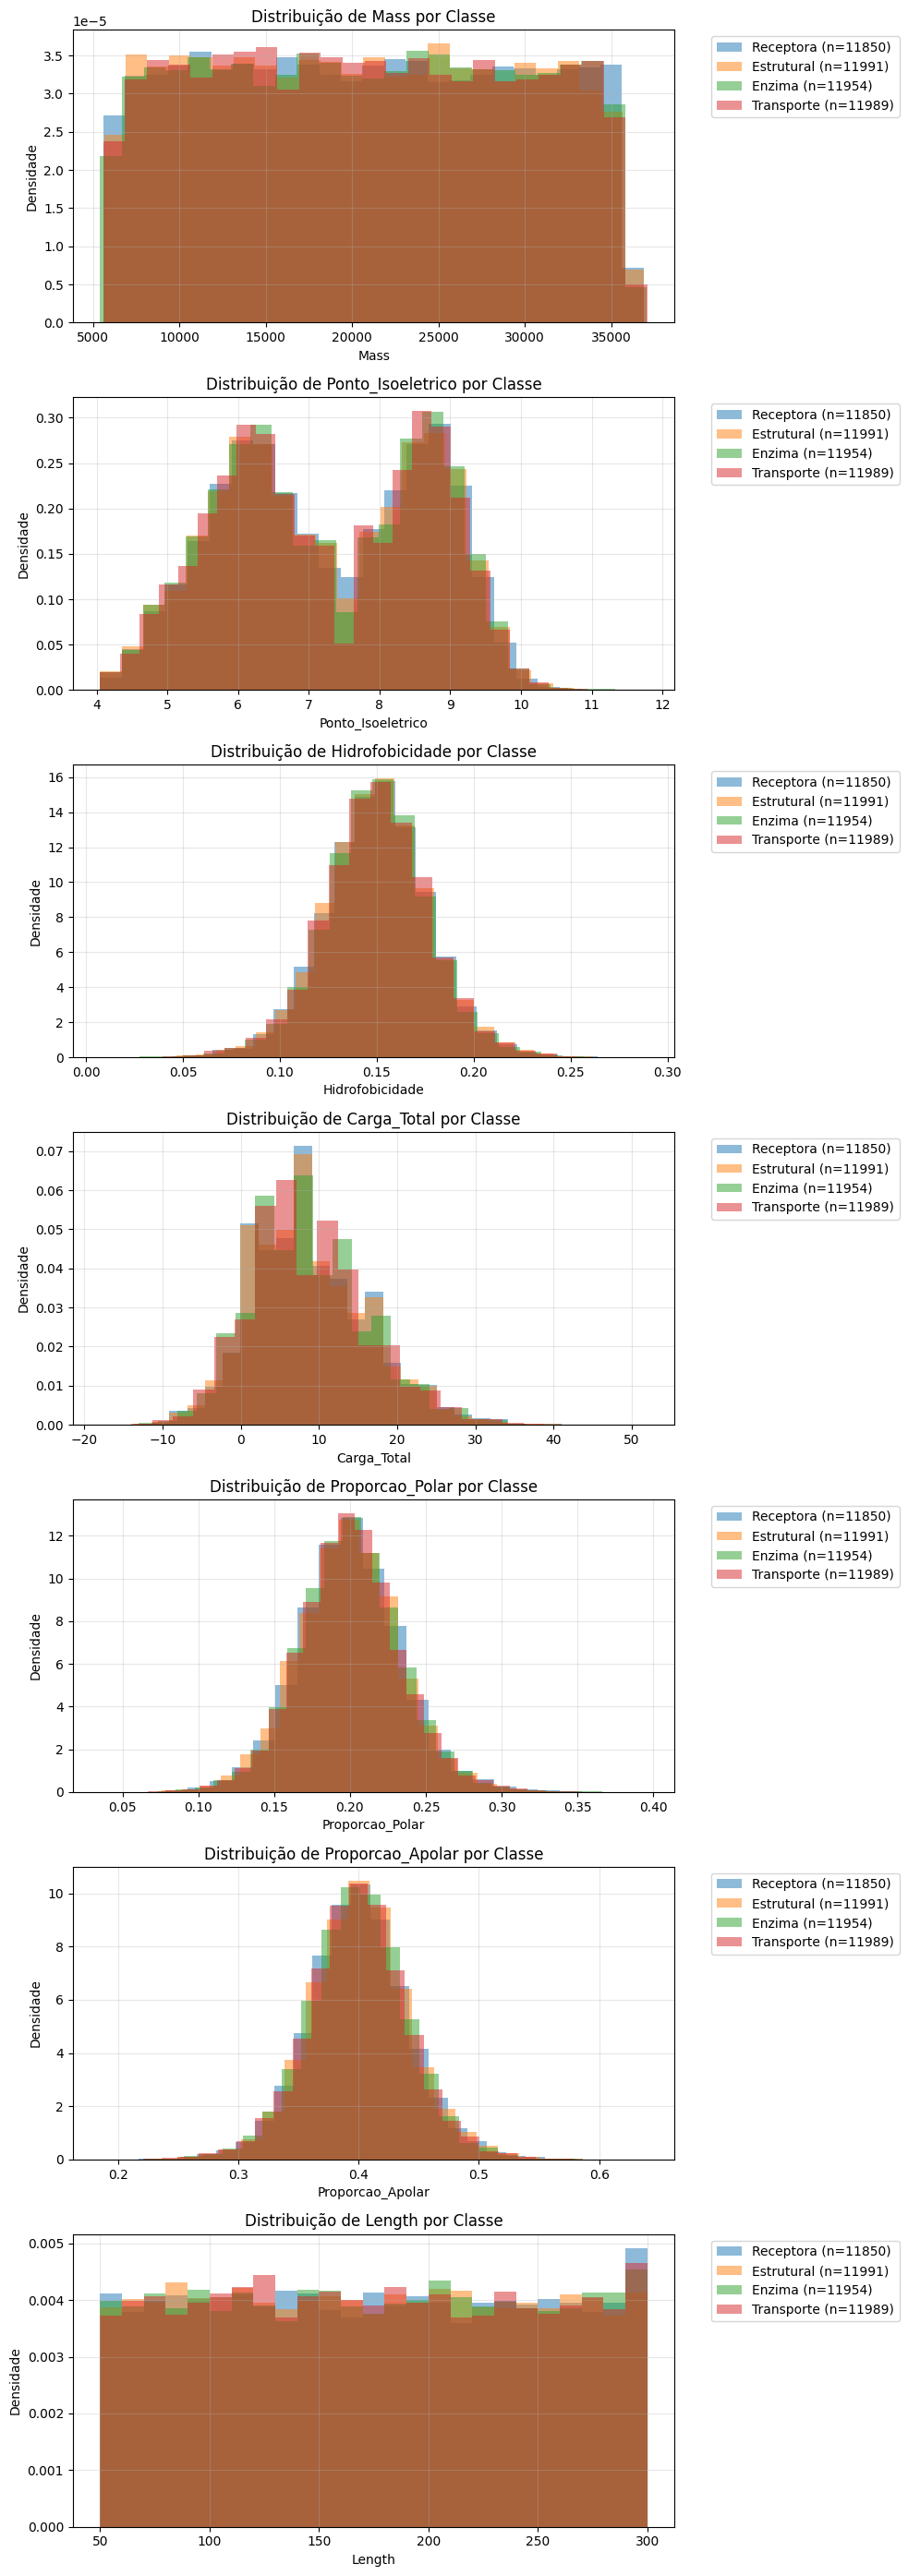

In [28]:
import matplotlib.pyplot as plt

df_puro_numericas = df_puro[['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 'Proporcao_Polar', 'Proporcao_Apolar', 'Length']]

colunas_numericas = df_puro_numericas.columns.tolist()

print(colunas_numericas)


fig, axes = plt.subplots(len(colunas_numericas), 1, 
                        figsize=(10, 4*len(colunas_numericas)))

if len(colunas_numericas) == 1:
    axes = [axes]

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, coluna in enumerate(colunas_numericas):
    ax = axes[i]
    
    for j, classe in enumerate(df_puro['Classes_GO'].unique()):
        dados_classe = df_puro[df_puro['Classes_GO'] == classe][coluna]
        ax.hist(dados_classe, bins=25, alpha=0.5, 
                label=f'{classe} (n={len(dados_classe)})', 
                color=cores[j], density=True)
    
    ax.set_xlabel(coluna)
    ax.set_ylabel('Densidade')
    ax.set_title(f'Distribuição de {coluna} por Classe')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Atributos e rótulos
X = df_puro[['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total',
            'Proporcao_Polar', 'Proporcao_Apolar', 'Length']]
y = df_puro['Classes_GO']

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predições
y_pred = clf.predict(X_test)

# Avaliação
print("\nRelatório de Classificação (df_puro):")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))



Relatório de Classificação (df_puro):
              precision    recall  f1-score   support

      Enzima       0.26      0.27      0.27      2389
  Estrutural       0.25      0.24      0.25      2428
   Receptora       0.25      0.25      0.25      2393
  Transporte       0.26      0.27      0.27      2347

    accuracy                           0.26      9557
   macro avg       0.26      0.26      0.26      9557
weighted avg       0.26      0.26      0.26      9557

Matriz de Confusão:
[[644 594 604 547]
 [639 593 601 595]
 [608 569 589 627]
 [564 570 580 633]]


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Parâmetros para buscar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar modelo base
dtree = DecisionTreeClassifier(random_state=42)

# GridSearch com validação cruzada
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                        cv=5, n_jobs=-1, scoring='f1_macro', verbose=1)

# Treinar
grid_search.fit(X_train, y_train)

# Ver melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Melhor modelo
best_model = grid_search.best_estimator_

# Predição com melhores parâmetros
y_pred_best = best_model.predict(X_test)

# Avaliação
print("\nRelatório de Classificação (modelo otimizado):")
print(classification_report(y_test, y_pred_best))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best))



Relatório de Classificação (modelo otimizado):
              precision    recall  f1-score   support

      Enzima       0.25      0.26      0.25      2389
  Estrutural       0.24      0.24      0.24      2428
   Receptora       0.25      0.25      0.25      2393
  Transporte       0.25      0.26      0.25      2347

    accuracy                           0.25      9557
   macro avg       0.25      0.25      0.25      9557
weighted avg       0.25      0.25      0.25      9557

Matriz de Confusão:
[[611 583 606 589]
 [633 576 616 603]
 [608 584 590 611]
 [572 611 564 600]]


In [32]:
# Lista dos 20 aminoácidos padrão
aminoacidos = list('ACDEFGHIKLMNPQRSTVWY')

# Função para calcular % de cada aminoácido
def calcular_frequencias(seq):
    seq = str(seq).upper()
    total = len(seq)
    frequencias = {aa: seq.count(aa) / total if total > 0 else 0 for aa in aminoacidos}
    return pd.Series(frequencias)

# Aplicar ao DataFrame
df_freqs = df_puro['Sequence'].apply(calcular_frequencias)

# Concatenar com df_puro
df_puro = pd.concat([df_puro.reset_index(drop=True), df_freqs.reset_index(drop=True)], axis=1)

# Visualizar
print(df_puro[aminoacidos].head())


          A         C         D         E         F         G         H  \
0  0.038278  0.038278  0.076555  0.062201  0.047847  0.047847  0.076555   
1  0.033520  0.050279  0.027933  0.089385  0.039106  0.072626  0.044693   
2  0.053691  0.053691  0.040268  0.040268  0.046980  0.087248  0.060403   
3  0.040816  0.040816  0.030612  0.030612  0.040816  0.051020  0.051020   
4  0.051383  0.043478  0.039526  0.067194  0.051383  0.039526  0.067194   

          I         K         L         M         N         P         Q  \
0  0.052632  0.038278  0.057416  0.038278  0.043062  0.057416  0.052632   
1  0.027933  0.067039  0.067039  0.044693  0.067039  0.016760  0.027933   
2  0.087248  0.046980  0.020134  0.080537  0.053691  0.033557  0.053691   
3  0.040816  0.030612  0.081633  0.020408  0.081633  0.030612  0.071429   
4  0.055336  0.039526  0.063241  0.063241  0.035573  0.063241  0.059289   

          R         S         T         V         W         Y  
0  0.043062  0.062201  0.052632  0

Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}

Relatório de Classificação (modelo otimizado):
              precision    recall  f1-score   support

      Enzima       0.25      0.27      0.26      2391
  Estrutural       0.24      0.24      0.24      2398
   Receptora       0.27      0.27      0.27      2370
  Transporte       0.25      0.23      0.24      2398

    accuracy                           0.25      9557
   macro avg       0.25      0.25      0.25      9557
weighted avg       0.25      0.25      0.25      9557



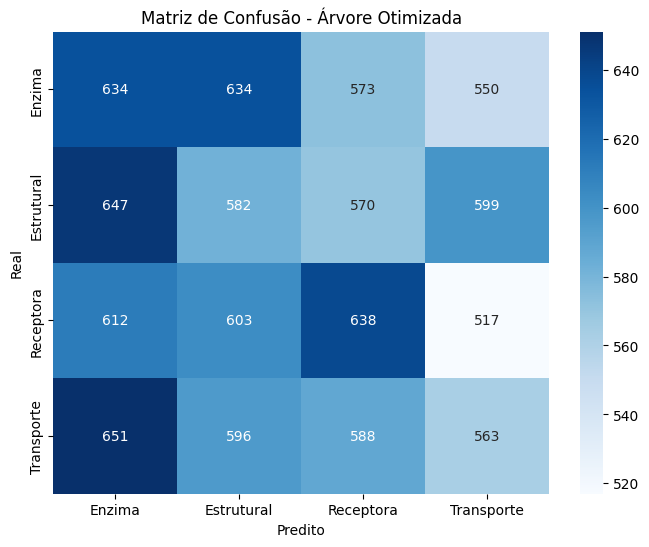

In [33]:

# Atributos numéricos + frequências de aminoácidos
features = ['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 
            'Proporcao_Polar', 'Proporcao_Apolar', 'Length'] + list('ACDEFGHIKLMNPQRSTVWY')

X = df_puro[features]
y = df_puro['Classes_GO']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Grid Search com validação cruzada
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo
melhor_modelo = grid_search.best_estimator_
y_pred = melhor_modelo.predict(X_test)

# Resultados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\nRelatório de Classificação (modelo otimizado):")
print(classification_report(y_test, y_pred))

# Matriz de confusão
matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=melhor_modelo.classes_, yticklabels=melhor_modelo.classes_)
plt.title("Matriz de Confusão - Árvore Otimizada")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

Note: you may need to restart the kernel to use updated packages.
Fitting 5 folds for each of 12 candidates, totalling 60 fits



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\dario\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:05:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Relatório de Classificação:
              precision    recall  f1-score   support

      Enzima       0.23      0.24      0.23      2391
  Estrutural       0.24      0.24      0.24      2398
   Receptora       0.25      0.23      0.24      2370
  Transporte       0.26      0.27      0.26      2398

    accuracy                           0.24      9557
   macro avg       0.24      0.24      0.24      9557
weighted avg       0.24      0.24      0.24      9557



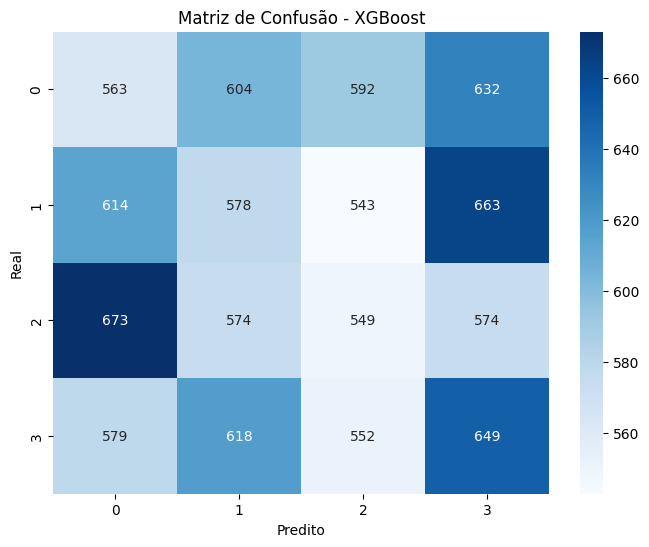

In [34]:
%pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Features numéricas + frequências de aminoácidos
features = ['Mass', 'Ponto_Isoeletrico', 'Hidrofobicidade', 'Carga_Total', 
            'Proporcao_Polar', 'Proporcao_Apolar', 'Length'] + list('ACDEFGHIKLMNPQRSTVWY')

X = df_puro[features]
y = df_puro['Classes_GO']




le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y agora será [0, 1, 2, 3]

classes = le.classes_



# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Modelo base
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# GridSearch (opcional, pode pular para treino direto se quiser)
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}


grid = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Avaliação
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Melhores parâmetros encontrados:")
print(grid.best_params_)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=classes))

# Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_,
            cmap='Blues')
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


In [35]:
# Quantidade por classe
print(df_puro['Classes_GO'].value_counts())


Classes_GO
Estrutural    11991
Transporte    11989
Enzima        11954
Receptora     11850
Name: count, dtype: int64
